# **Preprocessing**

In [31]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
#from fbprophet import Prophet

In [32]:
data = pd.read_csv('E:/Analyzing_Unemployment_rate_across_the_world/Business Case Studies/2ndpart.csv')
data.drop(['Unnamed: 0','code_3','continent','sub_region','average','91-20','20-21','21-22'],axis=1,inplace=True)
data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
2,Algeria,DZA,20.60,24.38,26.23,27.74,31.84,28.53,25.43,26.66,...,10.97,9.82,10.21,11.21,10.20,10.33,10.42,10.51,12.55,12.70
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Argentina,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,12.65,...,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [33]:
#transposing the dataset
data_n=data.T

#dropping unwanted columns
data_n.drop('Country Code',axis=0,inplace=True)

#converting rows into header column
header_row = 0
data_n.columns = data_n.iloc[header_row]
#print(data_n)

# Convert row to column header using DataFrame.iloc[]
data_n.columns = data_n.iloc[0]
#print(data_n)

#dropping unwanted columns
data_n.drop('Country Name',axis=0,inplace=True)

#sorting the columns
data_n.sort_index(axis=1,inplace=True)

#resetting index values as column name
data_n.reset_index(level=0,inplace=True)

data_n.rename(columns={'index':'year'},inplace=True)

#checking datatypes
datas=data_n.infer_objects()
datas.head()
#datas.drop('Country Name',axis=1,inplace=True)


Country Name,year,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,1991,10.65,10.31,20.60,4.21,5.44,1.6,9.58,3.42,0.9,...,8.95,1.9,1.68,9.45,2.09,12.35,11.60,8.32,18.90,4.94
1,1992,10.82,30.01,24.38,4.21,6.36,1.8,10.73,3.59,1.8,...,8.96,2.9,1.69,7.69,1.91,12.51,11.31,8.31,19.37,4.99
2,1993,10.72,25.26,26.23,4.23,10.10,5.3,10.87,4.25,4.5,...,8.35,4.9,1.73,6.60,1.97,12.70,11.29,8.35,19.70,4.97
3,1994,10.73,20.84,27.74,4.16,11.76,6.6,9.72,3.54,6.3,...,9.04,7.3,1.59,8.56,1.93,12.47,11.15,8.34,18.43,4.96
4,1995,11.18,14.61,31.84,4.11,18.80,6.7,8.47,4.35,7.2,...,10.02,7.8,1.74,10.24,1.90,12.13,11.10,8.96,16.81,5.63


# **Forecasting For India**

In [34]:
#retriving only india column
data_india = pd.DataFrame()
data_india['year'] = datas['year']
data_india['india'] = datas['India']
data_india.head()

,year,india
0,1991,5.60
1,1992,5.73
2,1993,5.69
3,1994,5.74
4,1995,5.76


In [35]:
#changing columns acc to prophet rules
data_india.columns = ['ds','y']
data_india.head()

,ds,y
0,1991,5.60
1,1992,5.73
2,1993,5.69
3,1994,5.74
4,1995,5.76


In [36]:
#converting dd datatype from string to datetime
data_india['ds'] = pd.to_datetime(data_india['ds'])
data_india.tail()

,ds,y
26,2017-01-01,5.36
27,2018-01-01,5.33
28,2019-01-01,5.27
29,2020-01-01,8.00
30,2021-01-01,5.98


<Axes: xlabel='ds'>

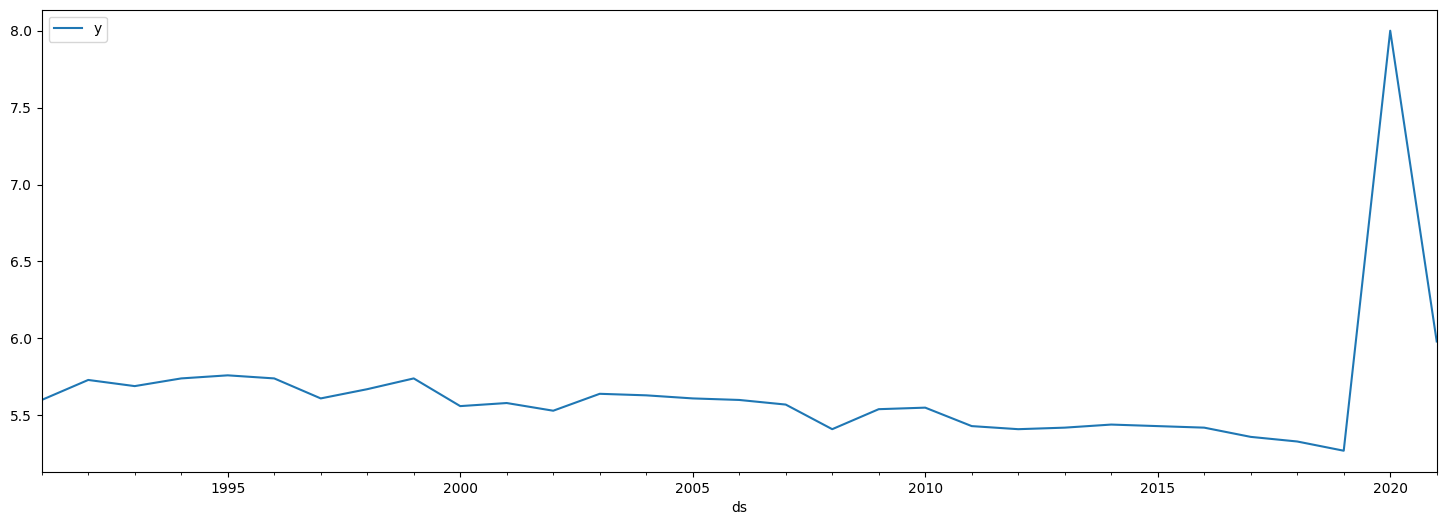

In [37]:
#plotting the unemployment rate of india
data_india.plot(x='ds',y='y',figsize=(18,6))

In [38]:
#predicting the future unemployment rate of india
m = Prophet() #calling the prophet function
m.fit(data_india) #fitting the data inside the fit function
future = m.make_future_dataframe(periods=10,freq='Y') #MS for monthly, H for hourly, Y for yearly
forecast = m.predict(future) #predicting the future using predict function

18:24:13 - cmdstanpy - INFO - Chain [1] start processing
18:24:14 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
36,2026-12-31,4.400438,6.347470,7.490521,4.400270,4.400599,2.507119,2.507119,2.507119,2.507119,2.507119,2.507119,0.0,0.0,0.0,6.907557
37,2027-12-31,4.405501,6.807998,7.950293,4.405290,4.405714,3.004807,3.004807,3.004807,3.004807,3.004807,3.004807,0.0,0.0,0.0,7.410308
38,2028-12-31,4.410579,5.621671,6.759461,4.410336,4.410840,1.759040,1.759040,1.759040,1.759040,1.759040,1.759040,0.0,0.0,0.0,6.169619
39,2029-12-31,4.415642,5.928275,7.044999,4.415355,4.415961,2.091635,2.091635,2.091635,2.091635,2.091635,2.091635,0.0,0.0,0.0,6.507277
40,2030-12-31,4.420705,6.395841,7.505140,4.420365,4.421091,2.507119,2.507119,2.507119,2.507119,2.507119,2.507119,0.0,0.0,0.0,6.927824


In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #retrieving only certain columns

,ds,yhat,yhat_lower,yhat_upper
36,2026-12-31,6.907557,6.347470,7.490521
37,2027-12-31,7.410308,6.807998,7.950293
38,2028-12-31,6.169619,5.621671,6.759461
39,2029-12-31,6.507277,5.928275,7.044999
40,2030-12-31,6.927824,6.395841,7.505140


In [41]:
plot_plotly(m ,forecast) #displaying the results in the form of visualization

# **Forecasting USA unemployment rate**

In [42]:
#retreiving USA unemployment rate
data_usa = pd.DataFrame()
data_usa['date'] = datas['year']
data_usa['usa']=datas['United States']
data_usa.head()

,date,usa
0,1991,6.80
1,1992,7.50
2,1993,6.90
3,1994,6.12
4,1995,5.65


In [43]:
#changing datatypes
data_usa['date']= pd.to_datetime(data_usa['date'])
data_usa.dtypes

#changing column names
data_usa.columns = ['ds','y']

In [44]:
#predicting the future unemployment rate of usa
n = Prophet() #calling the prophet function
n.fit(data_usa) #fitting the data inside the fit function
future_usa = n.make_future_dataframe(periods=10,freq='Y') #MS for monthly, H for hourly, Y for yearly
forecast_usa = n.predict(future_usa) #predicting the future using predict function

18:24:14 - cmdstanpy - INFO - Chain [1] start processing
18:24:14 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
forecast_usa[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #retrieving only certain columns

,ds,yhat,yhat_lower,yhat_upper
36,2026-12-31,6.383706,4.412260,8.297425
37,2027-12-31,6.563144,4.616465,8.539782
38,2028-12-31,6.128835,4.149144,8.222152
39,2029-12-31,6.248098,4.377212,8.286433
40,2030-12-31,6.397573,4.541104,8.374395


In [47]:
plot_plotly(n,forecast_usa) #visualizing past and forecasted data